In [2]:
import pandas as pd
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  

from bokeh.io import output_notebook
plt.style.use('ggplot')
output_notebook()

Loading BokehJS ...

In [102]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'

def plot_producer(producer_dir,producer_filename,p_number,fig_count):
    
    rates =pd.read_csv(directory + producer_dir + producer_filename)
    x_values = rates['Num_Messages'].tolist()
    y_values = rates['KB/sec'].tolist()
    f = plt.figure()
    plt.xlim(0,12500)
    plt.plot(x_values,y_values)
    plt.ylabel('KB/s')
    plt.xlabel('Msg number')
    plt.title("Producer " + str(p_number)+ "  throughput")
    text = 'Figure ' + str(fig_count) + ' : 4-1-1-5k'
    f.text(.20, .02, text, ha='center')
    
    return (x_values,y_values)

## Function for reading producer's data and then plotting  it's data
#example:
# a = plot_producer('5k-4-1-1-20170912-222705/producers/producer_2/','stdout-20170912-222716.csv',3,25)

In [101]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
def plot_scheduling_and_Total_Delay(spark_metrics_dir,fig_count):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay'].tolist()    # TODO: milisec to sec
    TotalDelay = metrics['TotalDelay'].tolist()
    x_values = range(0,metrics['SchedulingDelay'].count())
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + ": Spark Scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Delay in milisec')
    # add a line renderer with legend and line thickness
    p.line(x_values, scheduling_delay, legend="Scheduling Delay", line_width=2,line_color="red")
    p.line(x_values,TotalDelay,legend="Total Delay", line_width=2)
    #throughput = (TotalDelay - scheduling_delay)/metrics['NumberRecords']
    bplt.show(p)
    return (x_values,scheduling_delay)



In [80]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'

def plot_throughput_per_mini_batch(spark_metrics_dir,fig_count):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay']
    TotalDelay = metrics['TotalDelay']
    x_values = range(0,scheduling_delay.count())    
    throughput = 60*metrics['NumberRecords']/(TotalDelay - scheduling_delay)      # check That
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + " : Spark throughput/mini batch  - batch=60sec", x_axis_label='miniBatch Number', y_axis_label='records/batch')

    # add a line renderer with legend and line thickness
    p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="green")

    # show the results
    bplt.show(p)
    return  (x_values,throughput.tolist())

# Spark K-means  1-1-1 (p-b-c)

throughput = lastReceivedBatch_records/ (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime) <br>
Parameters: Streaming window: 60 seconds, Number of cluster centroids, Number  of data points <br>

In [98]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-1-1-20170906-150755/spark-consumer'
app = '/app-20170906150756-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [99]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 



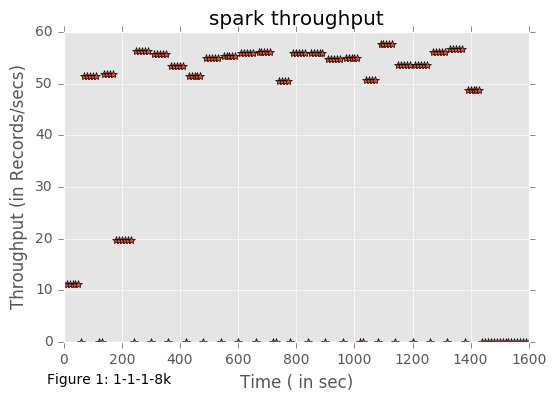

In [104]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504728486

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()

f = plt.figure()


plt.xlim(0,1600)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')

text = 'Figure 1: 1-1-1-8k'
f.text(.20, .02, text, ha='center')
x_1_1_1 = x_values
y_1_1_1 = throughput

###### Spark throughput / per minibatch  and Scheduling delay/minibatch

In [56]:
###### Spark throughput / per minibatch  and Scheduling delay/minibatch
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-1-1-20170906-150755/producers'
p111_metrics = pd.read_csv(directory + '/spark-metrics-20170906-150755.csv',skipinitialspace=True)
#p111_metrics.head()

In [57]:
metrics = p111_metrics
scheduling_delay = metrics['SchedulingDelay']
TotalDelay = metrics['TotalDelay']
N = scheduling_delay.count()
x_values = range(0,N)
y_values = scheduling_delay
y_values = y_values.tolist()

throughput = (TotalDelay - scheduling_delay)/metrics['NumberRecords']

# create a new plot with a title and axis labels
p = figure(title="Figure 23: Spark Scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Delay in sec')

# add a line renderer with legend and line thickness
p.line(x_values, y_values, legend="Scheduling Delay", line_width=2,line_color="red")
p.line(x_values,TotalDelay.tolist(),legend="Total Delay", line_width=2)
#p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="yellow")

#mytext = Label(x=10, y=70, text='Figure 23')
#p.add_layout(mytext)
#p.add_layout(Title(text="Figure 23", align="center"), "below")


# show the results
bplt.show(p)

In [58]:
metrics = p111_metrics
scheduling_delay = metrics['SchedulingDelay']
TotalDelay = metrics['TotalDelay']
N = scheduling_delay.count()
x_values = range(0,N)
throughput = 60*metrics['NumberRecords']/(TotalDelay - scheduling_delay)
# create a new plot with a title and axis labels
p = figure(title="Figure 24: Spark throughput/mini batch  - batch=60sec", x_axis_label='miniBatch Number', y_axis_label='records/batch')

# add a line renderer with legend and line thickness
p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="yellow")


# show the results
bplt.show(p)

### Producers

In [166]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p_1 = '1-1-1-20170906-150755/producers/'
p_1_rate = pd.read_csv(directory + p_1 + 'stdout-20170906-150755.csv')
#p_1_rate.head()

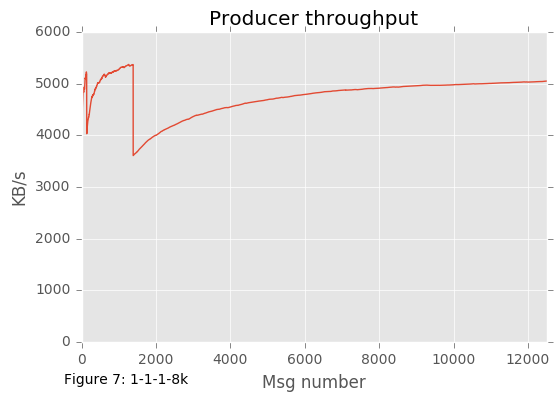

In [167]:
x_values = p_1_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p_1_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer throughput")
text = 'Figure 7: 1-1-1-8k'
f.text(.20, .02, text, ha='center')

xp_111 = x_values
yp_111 = y_values

# K-means : 4-1-1 (p-b-c)

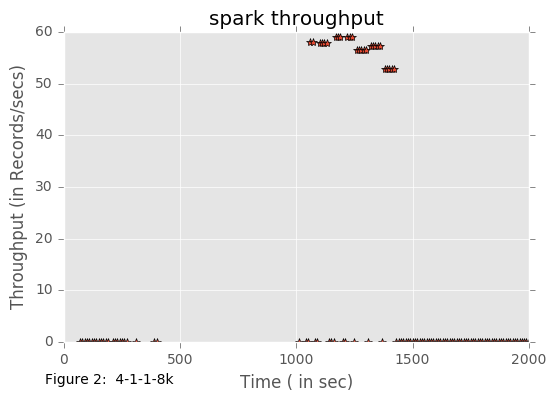

In [106]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/4-1-1-20170907-110405/spark_consumer'
app = '/app-20170907110406-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504800256

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time
    
f = plt.figure()

#plt.xticks()
plt.xlim(0,2000)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
plt.title("spark throughput")
text = 'Figure 2:  4-1-1-8k'
f.text(.20, .02, text, ha='center')
x_4_1_1 = x_values
y_4_1_1 = throughput


###### Spark throughput / per minibatch  and Scheduling delay/minibatch

In [344]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/4-1-1-20170907-110405/producers/producer_1'
p411_metrics = pd.read_csv(directory + '/spark-metrics-20170907-110405.csv',skipinitialspace=True)
#p411_metrics.head()

In [345]:
metrics = p411_metrics
scheduling_delay = metrics['SchedulingDelay']
TotalDelay = metrics['TotalDelay']
N = scheduling_delay.count()
x_values = range(0,N)
y_values = scheduling_delay
y_values = y_values.tolist()

#throughput = (TotalDelay - scheduling_delay)/metrics['NumberRecords']

# create a new plot with a title and axis labels
p = figure(title="Figure 25: Spark Scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Delay in sec')

# add a line renderer with legend and line thickness

p.line(x_values, y_values, legend="Scheduling Delay", line_width=2,line_color="red")
p.line(x_values,TotalDelay.tolist(),legend="Total Delay", line_width=2)
#p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="yellow")

#mytext = Label(x=10, y=70, text='Figure 23')
#p.add_layout(mytext)
#p.add_layout(Title(text="Figure 23", align="center"), "below")

# show the results
bplt.show(p)

In [347]:
metrics = p411_metrics
scheduling_delay = metrics['SchedulingDelay']
TotalDelay = metrics['TotalDelay']
N = scheduling_delay.count()
x_values = range(0,N)
y_values = scheduling_delay
y_values = y_values.tolist()

throughput = 60*metrics['NumberRecords']/(TotalDelay - scheduling_delay)

# create a new plot with a title and axis labels
p = figure(title="Figure 26: Spark throughput/minibatch - w:60sec", x_axis_label='miniBatch Number', y_axis_label='records/sec')

# add a line renderer with legend and line thickness
#p.line(x_values, y_values, legend="Scheduling Delay", line_width=2,line_color="red")
#p.line(x_values,TotalDelay.tolist(),legend="Total Delay", line_width=2)
p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="yellow")

#mytext = Label(x=10, y=70, text='Figure 23')
#p.add_layout(mytext)
#p.add_layout(Title(text="Figure 23", align="center"), "below")


# show the results
bplt.show(p)

#### Producers

In [169]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p411_1 = '4-1-1-20170907-110405/producers/producer_1/'
p411_1_rate = pd.read_csv(directory + p411_1 + 'stdout-20170907-110253.csv')
#p411_1_rate.head()

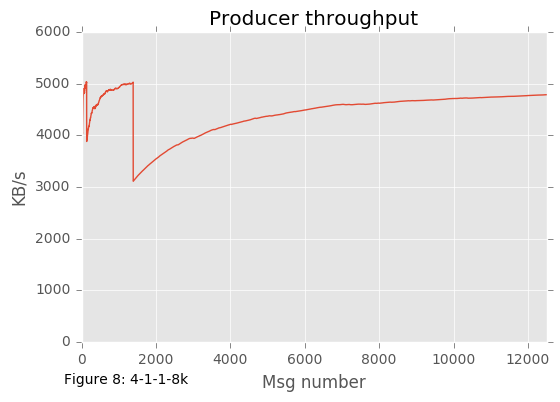

In [168]:
x_values = p411_1_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p411_1_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer throughput")
text = 'Figure 8: 4-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_411_1 = x_values
yp_411_1 = y_values

In [172]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p411_2 = '4-1-1-20170907-110405/producers/producer_2/'
p411_2_rate = pd.read_csv(directory + p411_2 + 'stdout-20170907-110408.csv')
#p411_2_rate.head()

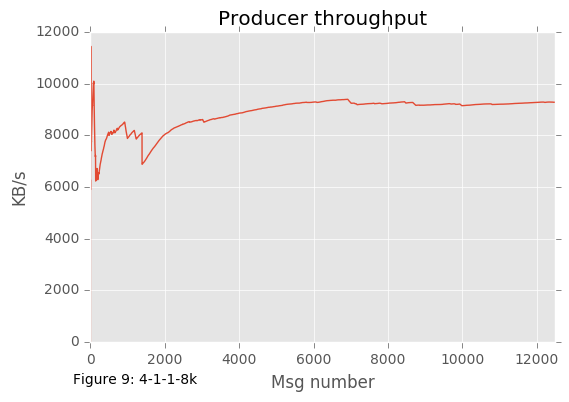

In [173]:
x_values = p411_2_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p411_2_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer throughput")
text = 'Figure 9: 4-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_411_2 = x_values
yp_411_2 = y_values

In [175]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p411_3 = '4-1-1-20170907-110405/producers/producer_3/'
p411_3_rate = pd.read_csv(directory + p411_3 + 'stdout-20170907-110410.csv')
#p411_3_rate.head()

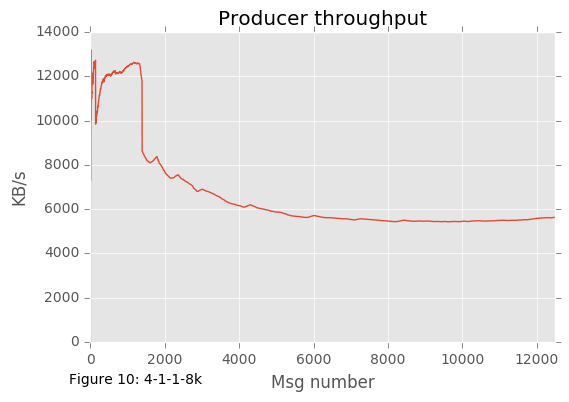

In [174]:
x_values = p411_3_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p411_3_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer throughput")
text = 'Figure 10: 4-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_411_3 = x_values
yp_411_3 = y_values

In [177]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p411_4 = '4-1-1-20170907-110405/producers/producer_3/'
p411_4_rate = pd.read_csv(directory + p411_3 + 'stdout-20170907-110410.csv')
#p411_4_rate.head()

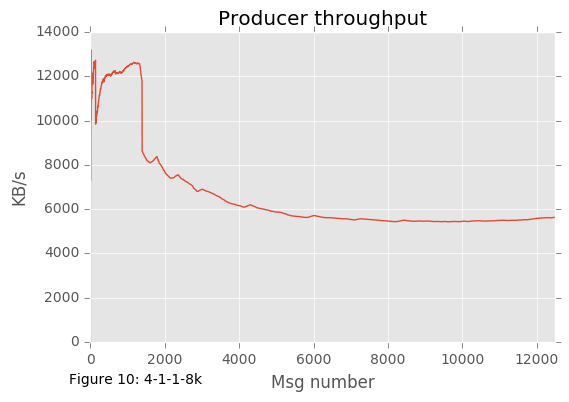

In [176]:
x_values = p411_4_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p411_4_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer throughput")
text = 'Figure 10: 4-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_411_4 = x_values
yp_411_4 = y_values

##### producer rates comparison  of 4-1-1 -8k

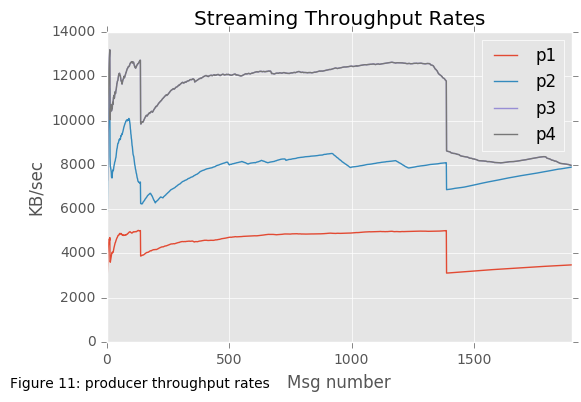

In [234]:
f = plt.figure()
plt.plot(xp_411_1,yp_411_1,label='p1') 
plt.plot(xp_411_2,yp_411_2,label='p2') 
plt.plot(xp_411_3,yp_411_3,label='p3') 
plt.plot(xp_411_4,yp_411_4,label='p4')

plt.xlim(0,1900)
plt.legend()
plt.title('Streaming Throughput Rates')
plt.ylabel('KB/sec')
plt.xlabel('Msg number')

text = 'Figure 11: producer throughput rates'
f.text(.18, .01, text, ha='center')

# K-means : 8-1-1 (p-b-c)

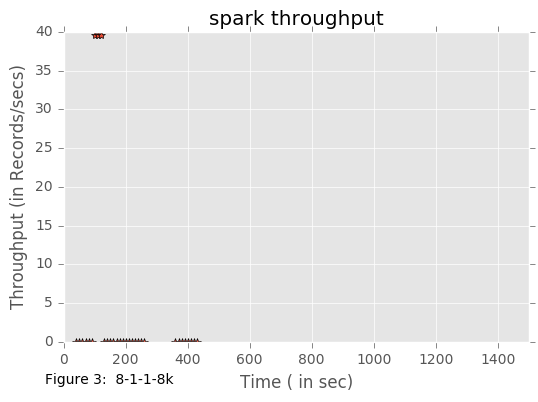

In [110]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/8-1-1-20170907-163836/spark-consumer'
app = '/app-20170907163838-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)


throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504820328

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time
    
f = plt.figure()

#plt.xticks()
plt.xlim(0,1500)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
text = 'Figure 3:  8-1-1-8k'
f.text(.20, .02, text, ha='center')
x_8_1_1 = x_values
y_8_1_1 = throughput


In [182]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_1 = '8-1-1-20170907-163836/producers/producer_1/'
p811_1_rate = pd.read_csv(directory + p811_1 + 'stdout-20170907-163849.csv')
#p811_1_rate.head()

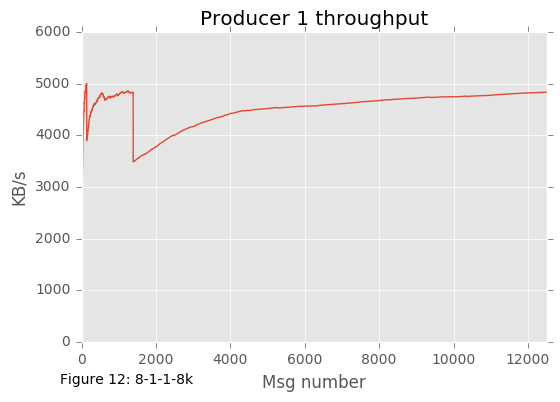

In [200]:
x_values = p811_1_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_1_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 1 throughput")
text = 'Figure 12: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_1 = x_values
yp_811_1 = y_values

In [185]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_2 = '8-1-1-20170907-163836/producers/producer_2/'
p811_2_rate = pd.read_csv(directory + p811_2 + 'stdout-20170907-163837.csv')
#p811_2_rate.head()

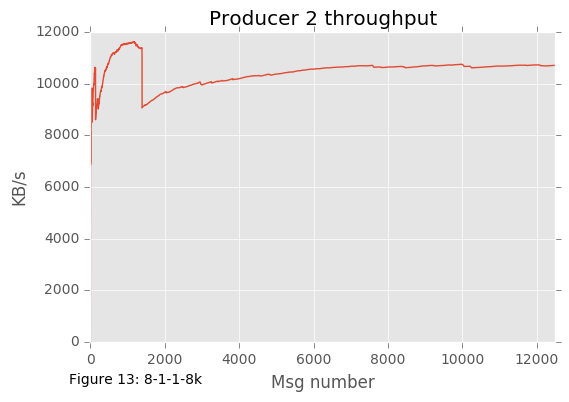

In [201]:
x_values = p811_2_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_2_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 2 throughput")
text = 'Figure 13: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_2 = x_values
yp_811_2 = y_values

In [187]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_3 = '8-1-1-20170907-163836/producers/producer_3/'
p811_3_rate = pd.read_csv(directory + p811_3 + 'stdout-20170907-163838.csv')
#p811_3_rate.head()

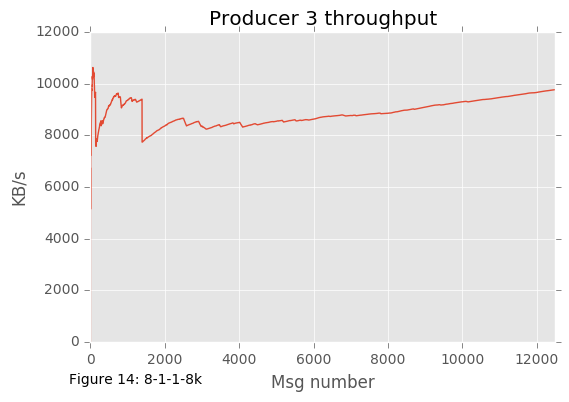

In [202]:
x_values = p811_3_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_3_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 3 throughput")
text = 'Figure 14: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_3 = x_values
yp_811_3 = y_values

In [203]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_4 = '8-1-1-20170907-163836/producers/producer_4/'
p811_4_rate = pd.read_csv(directory + p811_4 + 'stdout-20170907-163840.csv')
#p811_4_rate.head()

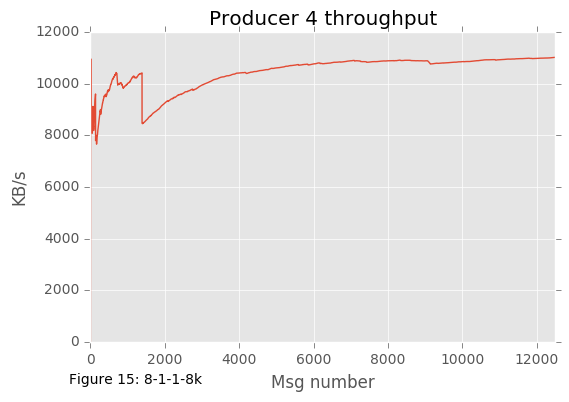

In [204]:
x_values = p811_4_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_4_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 4 throughput")
text = 'Figure 15: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_4 = x_values
yp_811_4 = y_values

In [193]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_5 = '8-1-1-20170907-163836/producers/producer_5/'
p811_5_rate = pd.read_csv(directory + p811_5 + 'stdout-20170907-163841.csv')
#p811_5_rate.head()

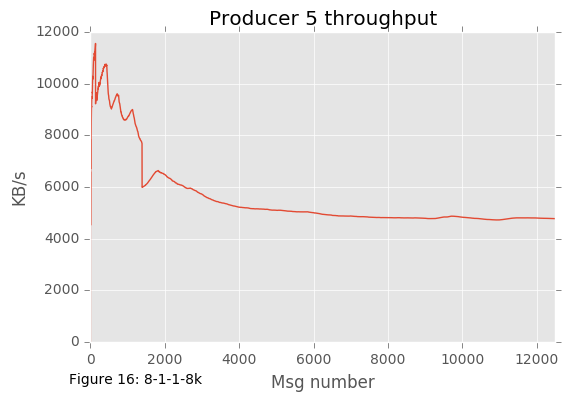

In [205]:
x_values = p811_5_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_5_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 5 throughput")
text = 'Figure 16: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_5 = x_values
yp_811_5 = y_values

In [191]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_6 = '8-1-1-20170907-163836/producers/producer_6/'
p811_6_rate = pd.read_csv(directory + p811_6 + 'stdout-20170907-163842.csv')
#p811_6_rate.head()

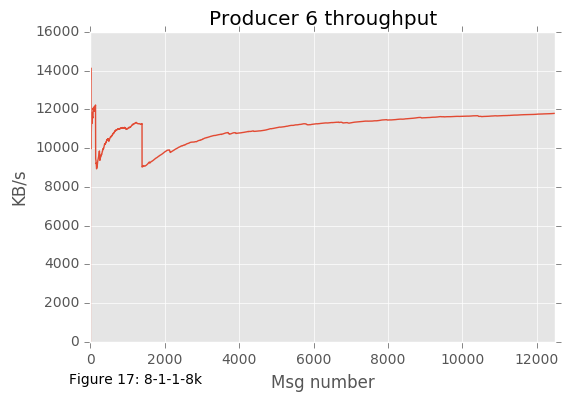

In [206]:
x_values = p811_6_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_6_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 6 throughput")
text = 'Figure 17: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_6 = x_values
yp_811_6 = y_values

In [196]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_7 = '8-1-1-20170907-163836/producers/producer_7/'
p811_7_rate = pd.read_csv(directory + p811_7 + 'stdout-20170907-163844.csv')
#p811_7_rate.head()

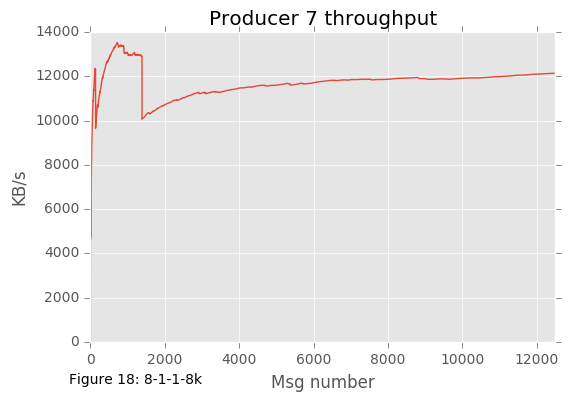

In [207]:
x_values = p811_7_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_7_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 7 throughput")
text = 'Figure 18: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_7 = x_values
yp_811_7 = y_values

In [197]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p811_8 = '8-1-1-20170907-163836/producers/producer_8/'
p811_8_rate = pd.read_csv(directory + p811_8 + 'stdout-20170907-163846.csv')
#p811_8_rate.head()

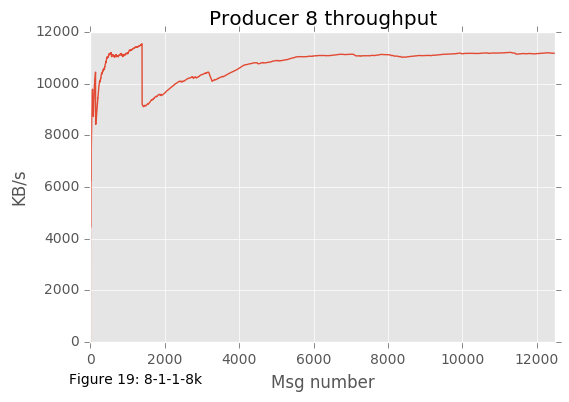

In [208]:
x_values = p811_8_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p811_8_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 8 throughput")
text = 'Figure 19: 8-1-1-8k'
f.text(.20, .02, text, ha='center')
xp_811_8 = x_values
yp_811_8 = y_values

##### producer rates comparison  of 8-1-1 -8k


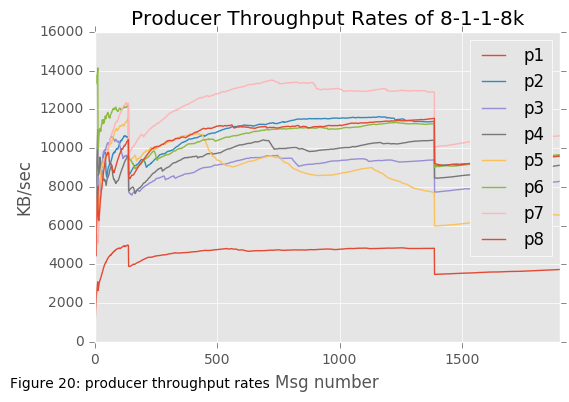

In [213]:
f = plt.figure()
plt.plot(xp_811_1,yp_811_1,label='p1') 
plt.plot(xp_811_2,yp_811_2,label='p2') 
plt.plot(xp_811_3,yp_811_3,label='p3') 
plt.plot(xp_811_4,yp_811_4,label='p4')
plt.plot(xp_811_5,yp_811_5,label='p5') 
plt.plot(xp_811_6,yp_811_6,label='p6') 
plt.plot(xp_811_7,yp_811_7,label='p7') 
plt.plot(xp_811_8,yp_811_8,label='p8')

plt.xlim(0,1900)
plt.legend()
plt.title('Producer Throughput Rates of 8-1-1-8k')
plt.ylabel('KB/sec')
plt.xlabel('Msg number')

text = 'Figure 20: producer throughput rates'
f.text(.20, .01, text, ha='center')

# K-means : 1-1-1 (p-b-c)   - 5K

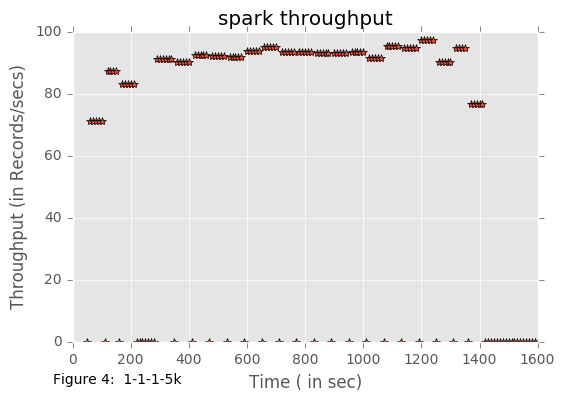

In [111]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/5k-1-1-1-20170907-192211/spark-consumer'
app = '/app-20170907192212-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)


throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504830142

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

f = plt.figure()
#plt.xticks()
plt.xlim(0,1600)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
text = 'Figure 4:  1-1-1-5k'
f.text(.20, .02, text, ha='center')
x_1_1_1_5k = x_values
y_1_1_1_5k = throughput

#### Producers

In [215]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p111_1_5k = '5k-1-1-1-20170907-192211/producers/producer_1/'
p111_1_5k_rate = pd.read_csv(directory + p111_1_5k + 'stdout-20170907-192218.csv')
#p111_1_5k_rate.head()

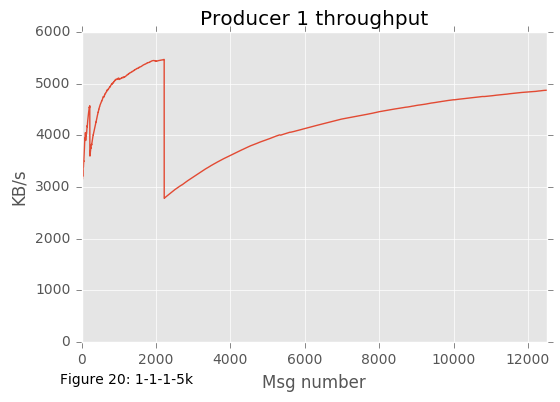

In [223]:
x_values = p111_1_5k_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p111_1_5k_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 1 throughput")
text = 'Figure 20: 1-1-1-5k'
f.text(.20, .02, text, ha='center')
xp_111_5k = x_values
yp_111_5k = y_values

# K-means : 2-1-1 (p-b-c)   - 5K

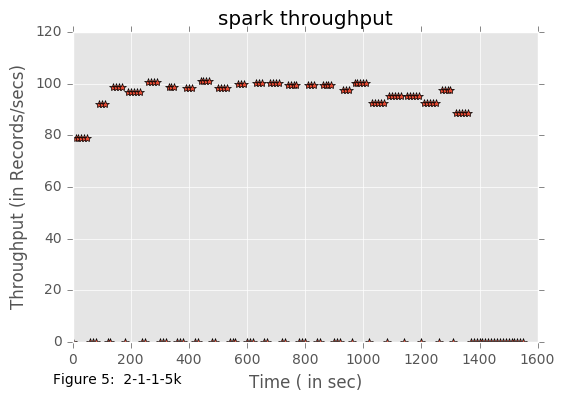

In [113]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/5k-2-1-1-20170908-093541/spark-consumer'
app = '/app-20170908093542-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)


throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504881372

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time
    
f = plt.figure()

#plt.xticks()
plt.xlim(0,1600)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
text = 'Figure 5:  2-1-1-5k'
f.text(.20, .02, text, ha='center')
x_2_1_1_5k = x_values
y_2_1_1_5k = throughput

In [220]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p211_1_5k = '5k-2-1-1-20170908-093541/producers/producer_1/'
p211_1_5k_rate = pd.read_csv(directory + p211_1_5k + 'stdout-20170908-093546.csv')
#p211_1_5k_rate.head()

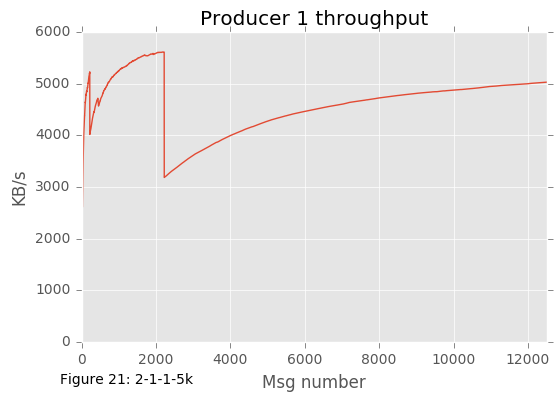

In [224]:
x_values = p211_1_5k_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p211_1_5k_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 1 throughput")
text = 'Figure 21: 2-1-1-5k'
f.text(.20, .02, text, ha='center')
xp_211_1_5k = x_values
yp_211_1_5k = y_values

In [222]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
p211_2_5k = '5k-2-1-1-20170908-093541/producers/producer_2/'
p211_2_5k_rate = pd.read_csv(directory + p211_2_5k + 'stdout-20170908-093538.csv')
#p211_2_5k_rate.head()

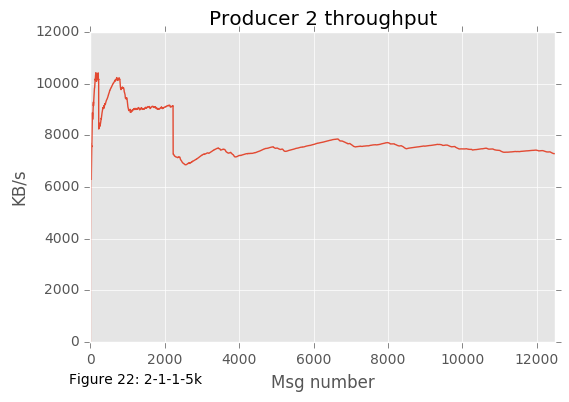

In [228]:
x_values = p211_2_5k_rate['Num_Messages']
x_values = x_values.tolist()
y_values = p211_2_5k_rate['KB/sec']
y_values = y_values.tolist()

f = plt.figure()
plt.xlim(0,12500)
plt.plot(x_values,y_values)
plt.ylabel('KB/s')
plt.xlabel('Msg number')
plt.title("Producer 2 throughput")
text = 'Figure 22: 2-1-1-5k'
f.text(.20, .02, text, ha='center')
xp_211_2_5k = x_values
yp_211_2_5k = y_values

##### producer rates comparison  of 2-1-1 -5k


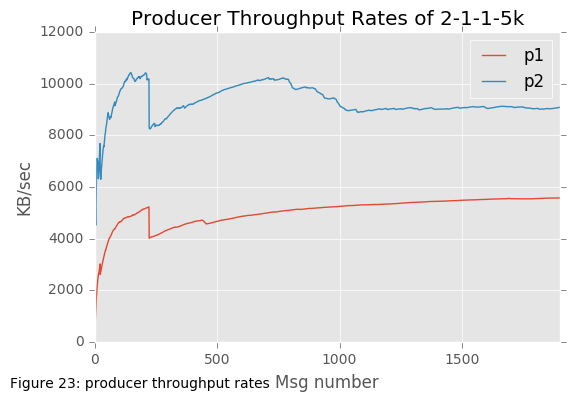

In [229]:
f = plt.figure()
plt.plot(xp_211_1_5k,yp_211_1_5k,label='p1') 
plt.plot(xp_211_2_5k,yp_211_2_5k,label='p2') 


plt.xlim(0,1900)
plt.legend()
plt.title('Producer Throughput Rates of 2-1-1-5k')
plt.ylabel('KB/sec')
plt.xlabel('Msg number')

text = 'Figure 23: producer throughput rates'
f.text(.20, .01, text, ha='center')

# Spark throughput rate   Comparison 

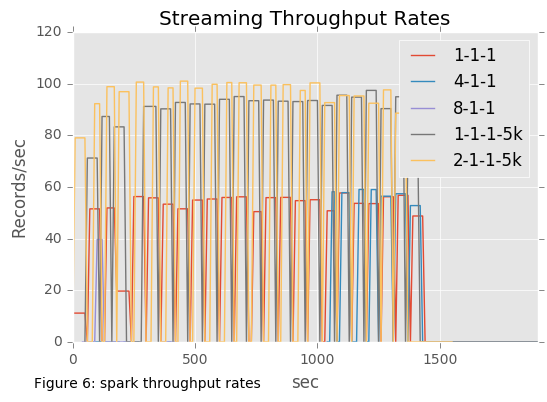

In [122]:
f = plt.figure()
plt.plot(x_1_1_1,y_1_1_1,label='1-1-1') 
plt.plot(x_4_1_1,y_4_1_1,label='4-1-1') 
plt.plot(x_8_1_1,y_8_1_1,label='8-1-1') 
plt.plot(x_1_1_1_5k,y_1_1_1_5k,label='1-1-1-5k')
plt.plot(x_2_1_1_5k,y_2_1_1_5k,label='2-1-1-5k')
plt.xlim(0,1900)
plt.legend()
plt.title('Streaming Throughput Rates')
plt.ylabel('Records/sec')
plt.xlabel('sec')

text = 'Figure 6: spark throughput rates'
f.text(.25, .01, text, ha='center')
#f.savefig('throughput.pdf')

Below are the older experiments

# K-means : 2-1-2 (p-b-c)

In [69]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/2-1-2-20170810-092604/spark-consumer'
app = '/app-20170810092602-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [70]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0

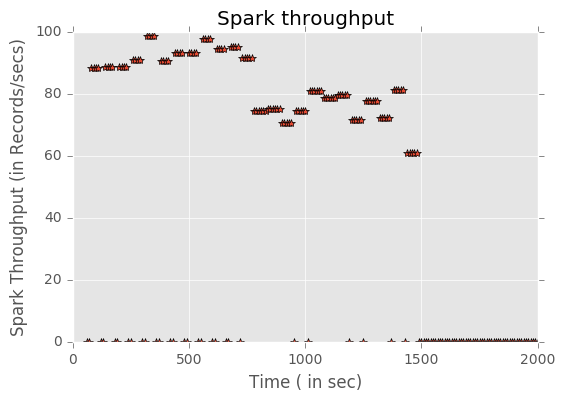

In [72]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1502375172

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()
plt.xlim(0,2000)
plt.plot(x_values,throughput,'*')
plt.ylabel('Spark Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("Spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
x_2_1_2 =x_values
y_2_1_2 = throughput

## K-means : 4-1-1 (p-b-c)

In [10]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/4-1-1-20170901-143355/spark_consumer'
app = '/app-20170901143342-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [11]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0

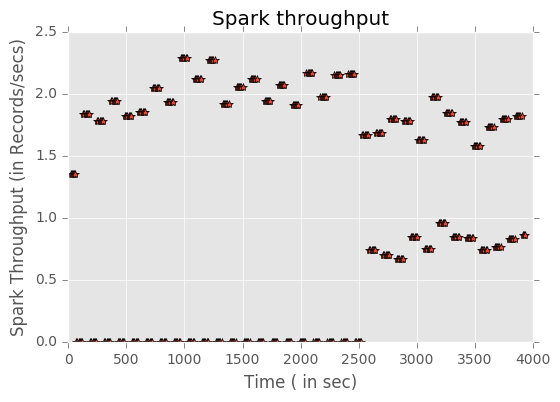

In [12]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504294432

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()
plt.xlim(0,4000)
plt.plot(x_values,throughput,'*')
plt.ylabel('Spark Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("Spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
x_4_1_1 =x_values
y_4_1_1 = throughput

## K-means : 8-1-1 (p-b-c)

In [13]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/8-1-1-20170901-185950/spark-consumer'
app = '/app-20170901185951-0000'
lastReceivedBatch_processingEndTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = app+'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [14]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0

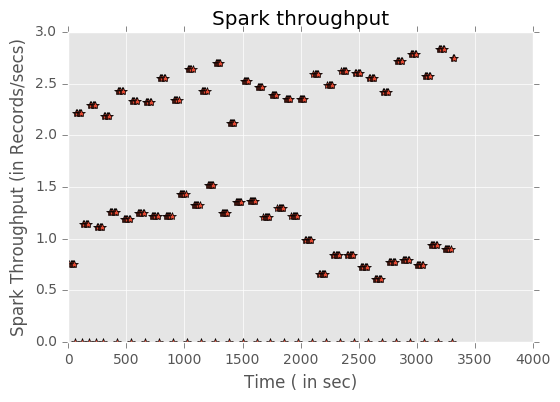

In [15]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1504310402

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - shift_time

#plt.xticks()
plt.xlim(0,4000)
plt.plot(x_values,throughput,'*')
plt.ylabel('Spark Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("Spark throughput")
#plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')
x_8_1_1 =x_values
y_8_1_1 = throughput

## Comparing throughput numbers 

throughput = lastReceivedBatch_records/ (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime) <br>


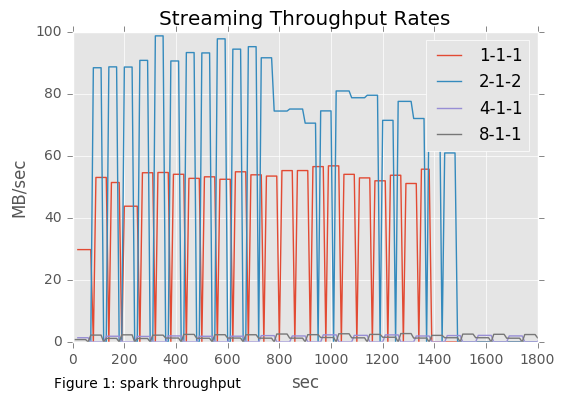

In [57]:
f = plt.figure()
plt.plot(x_1_1_1,y_1_1_1,label='1-1-1') 
plt.plot(x_2_1_2,y_2_1_2,label='2-1-2') 
plt.plot(x_4_1_1,y_4_1_1,label='4-1-1') 
plt.plot(x_8_1_1,y_8_1_1,label='8-1-1') 
plt.xlim(0,1800)
plt.legend()
plt.title('Streaming Throughput Rates')
plt.ylabel('MB/sec')
plt.xlabel('sec')

text = 'Figure 1: spark throughput'
f.text(.25, .01, text, ha='center')
#f.savefig('throughput.pdf')

##### New Data

In [ ]:
f = plt.figure()
plt.plot(x_1_1_1,y_1_1_1,label='1-1-1') 
plt.plot(x_2_1_2,y_2_1_2,label='2-1-2') 
plt.plot(x_4_1_1,y_4_1_1,label='4-1-1') 
plt.plot(x_8_1_1,y_8_1_1,label='8-1-1') 
plt.xlim(0,1800)
plt.legend()
plt.title('Streaming Throughput Rates')
plt.ylabel('MB/sec')
plt.xlabel('sec')

text = 'Figure 2: spark throughput'
f.text(.25, .01, text, ha='center')
f.savefig('throughput.pdf')

In [24]:
!pwd

/home/georgeha/repos/lab_reports


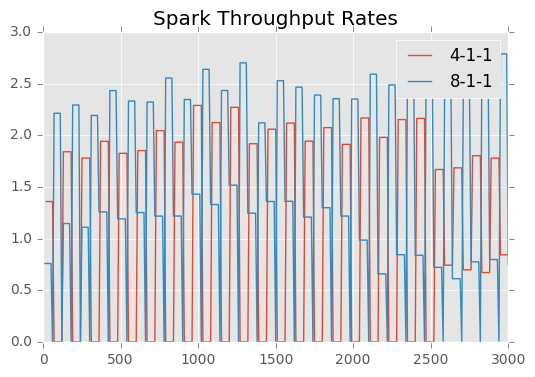

In [25]:
plt.plot(x_4_1_1,y_4_1_1,label='4-1-1')
plt.plot(x_8_1_1,y_8_1_1,label='8-1-1')
plt.xlim(0,3000)
plt.legend()
plt.title('Spark Throughput Rates')

## K-means : 5k-4-1-1 (p-b-c)

#### Producers

In [38]:
#p_411_1_5k_20170912_222705 = plot_producer('5k-4-1-1-20170912-222705/producers/producer_1/','stdout-20170912-222712.csv',1,24)
#p_411_2_5k_20170912_222705 = plot_producer('5k-4-1-1-20170912-222705/producers/producer_2/','stdout-20170912-222716.csv',2,25)
#p_411_3_5k_20170912_222705 = plot_producer('5k-4-1-1-20170912-222705/producers/producer_3/','stdout-20170912-222718.csv',3,26)
#p_411_4_5k_20170912_222705 = plot_producer('5k-4-1-1-20170912-222705/producers/producer_4/','stdout-20170912-222720.csv',4,27)

In [127]:
# create a new plot with a title and axis labels
p = figure(title="Figure 28: 5k-4-1-1 Producers throughput", x_axis_label='Msg number', y_axis_label='KB/s')

# add a line renderer with legend and line thickness
p.line(p_411_1_5k_20170912_222705[0],p_411_1_5k_20170912_222705[1], legend="producer_1", line_width=2,line_color="red")
p.line(p_411_2_5k_20170912_222705[0],p_411_2_5k_20170912_222705[1],legend="producer_2", line_width=2)
p.line(p_411_3_5k_20170912_222705[0],p_411_3_5k_20170912_222705[1], legend="producer_3", line_width=2,line_color="green")
p.line(p_411_4_5k_20170912_222705[0],p_411_4_5k_20170912_222705[1], legend="producer_4", line_width=2,line_color="orange")

# show the results
bplt.show(p)
total_producer_throughput_20170912_222705 = sum(p_411_1_5k_20170912_222705[1] +p_411_2_5k_20170912_222705[1] + p_411_3_5k_20170912_222705[1] + p_411_4_5k_20170912_222705[1])
total_producer_throughput_20170912_222705 /= len(p_411_4_5k_20170912_222705[1])
print 'Total Average throughput is: %.3f KB/s ' % total_producer_throughput_20170912_222705
print 'Average Throughput/producer is: %.3f KB/s '  % (total_producer_throughput_20170912_222705/4)


Total Average throughput is: 33299.707 KB/s 
Average Throughput/producer is: 8324.927 KB/s 


#### Spark Throughput per mini batch  and Scheduling Delay

In [64]:
sched_delay_20170912_222705 = plot_scheduling_and_Total_Delay('5k-4-1-1-20170912-222705/spark-metrics-20170912-222705.csv',29)

In [82]:
throuhgput_5k_4_1_1_20170912_222705 = plot_throughput_per_mini_batch('5k-4-1-1-20170912-222705/spark-metrics-20170912-222705.csv',29)

## K-means : 5k-4-1-2 (p-b-c)  - 5k-4-1-2-20170913-200951

#### Producers

In [92]:
#p_412_1_5k_20170913_200951 = plot_producer('5k-4-1-2-20170913-200951/producers/producer_1/','stdout-20170913-200952.csv',1,30)
#p_412_2_5k_20170913_200951 = plot_producer('5k-4-1-2-20170913-200951/producers/producer_2/','stdout-20170913-200954.csv',2,31)
#p_412_3_5k_20170913_200951 = plot_producer('5k-4-1-2-20170913-200951/producers/producer_3/','stdout-20170913-200955.csv',3,32)
#p_412_4_5k_20170913_200951 = plot_producer('5k-4-1-2-20170913-200951/producers/producer_4/','stdout-20170913-200957.csv',4,33)

In [126]:
# create a new plot with a title and axis labels
p = figure(title="Figure 34: 5k-4-1-2 Producers throughput", x_axis_label='Msg number', y_axis_label='KB/s')

# add a line renderer with legend and line thickness
p.line(p_412_1_5k_20170913_200951[0],p_412_1_5k_20170913_200951[1], legend="producer_1", line_width=2,line_color="red")
p.line(p_412_2_5k_20170913_200951[0],p_412_2_5k_20170913_200951[1],legend="producer_2", line_width=2)
p.line(p_412_3_5k_20170913_200951[0],p_412_3_5k_20170913_200951[1], legend="producer_3", line_width=2,line_color="green")
p.line(p_412_4_5k_20170913_200951[0],p_412_4_5k_20170913_200951[1], legend="producer_4", line_width=2,line_color="orange")

# show the results
bplt.show(p)
total_producer_throughput_20170912_222705 = sum(p_412_1_5k_20170913_200951[1] +p_412_2_5k_20170913_200951[1] + p_412_3_5k_20170913_200951[1] + p_412_4_5k_20170913_200951[1])
total_producer_throughput_20170912_222705 /= len(p_412_4_5k_20170913_200951[1])
print 'Total Average throughput is: %.3f KB/s ' % total_producer_throughput_20170912_222705
print 'Average Throughput/producer is: %.3f KB/s '  % (total_producer_throughput_20170912_222705/4)


Total Average throughput is: 36202.110 KB/s 
Average Throughput/producer is: 9050.527 KB/s 


#### Spark Throughput per mini batch  and Scheduling Delay

In [103]:
sched_delay_20170913_200951 = plot_scheduling_and_Total_Delay('5k-4-1-2-20170913-200951/spark-metrics-20170913-200951.csv',35)

In [105]:
throuhgput_5k_4_1_1_20170913_200951 = plot_throughput_per_mini_batch('5k-4-1-2-20170913-200951/spark-metrics-20170913-200951.csv',30)

## K-means : 5k-8-1-1 (p-b-c)  - 5k-8-1-1-20170913-140737


#### Producers

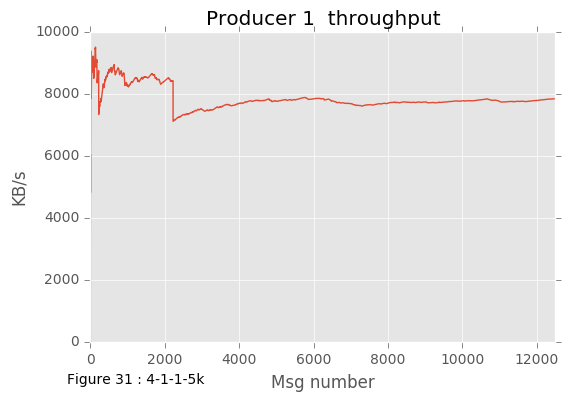

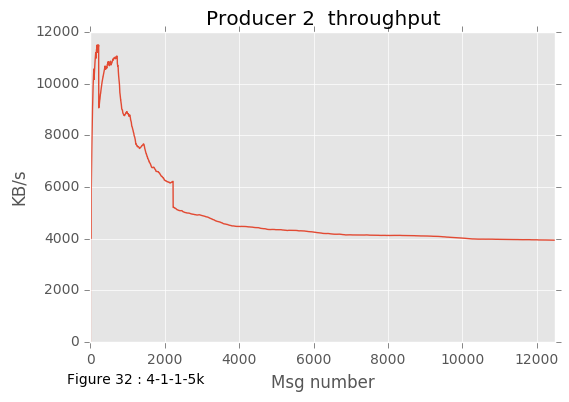

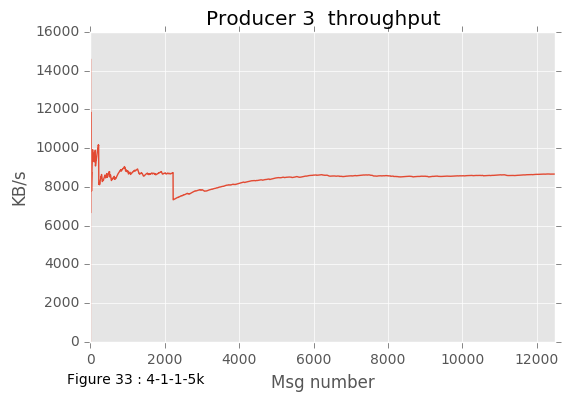

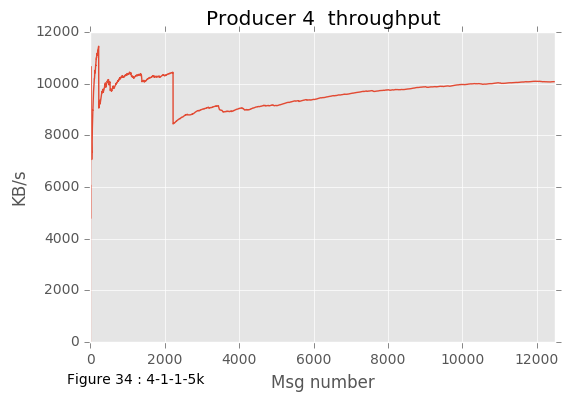

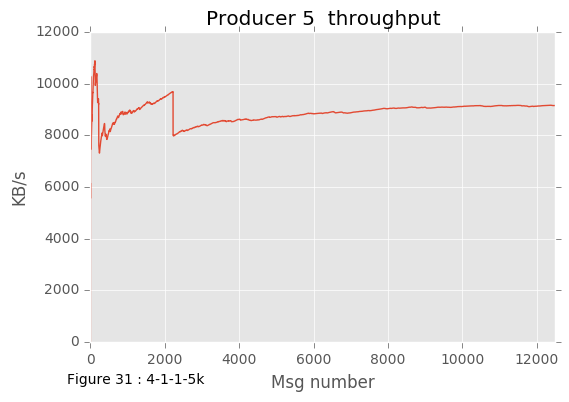

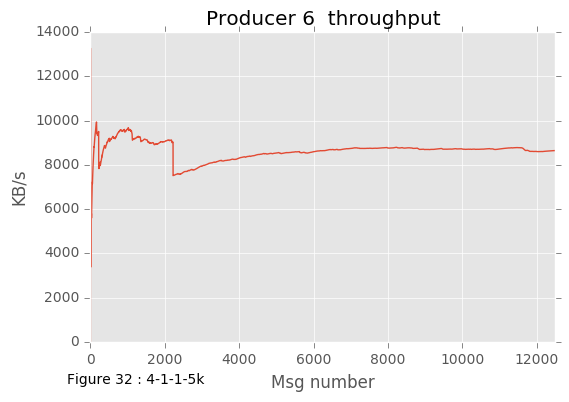

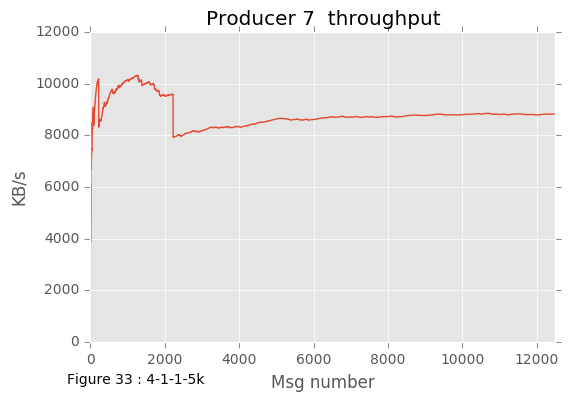

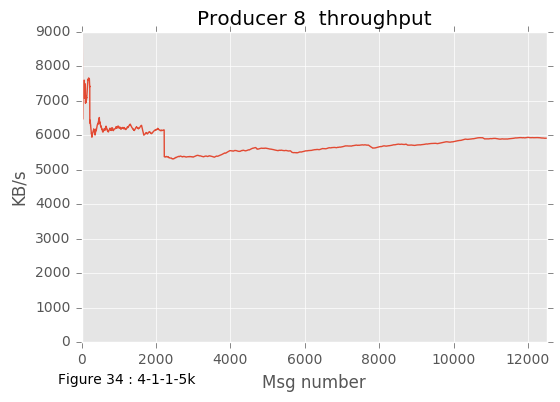

In [122]:
p_811_1_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_1/','stdout-20170913-140739.csv',1,31)
p_811_2_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_2/','stdout-20170913-140742.csv',2,32)
p_811_3_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_3/','stdout-20170913-140744.csv',3,33)
p_811_4_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_4/','stdout-20170913-140745.csv',4,34)
p_811_5_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_5/','stdout-20170913-140748.csv',5,31)
p_811_6_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_6/','stdout-20170913-140725.csv',6,32)
p_811_7_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_7/','stdout-20170913-140723.csv',7,33)
p_811_8_5k_20170913_140737 = plot_producer('5k-8-1-1-20170913-140737/producers/producer_8/','stdout-20170913-140722.csv',8,34)

In [125]:
# create a new plot with a title and axis labels
p = figure(title="Figure 35: 5k-8-1-1 Producers throughput", x_axis_label='Msg number', y_axis_label='KB/s')

# add a line renderer with legend and line thickness
p.line(p_811_1_5k_20170913_140737[0],p_811_1_5k_20170913_140737[1], legend="producer_1", line_width=2,line_color="red")
p.line(p_811_2_5k_20170913_140737[0],p_811_2_5k_20170913_140737[1],legend="producer_2", line_width=2)
p.line(p_811_3_5k_20170913_140737[0],p_811_3_5k_20170913_140737[1], legend="producer_3", line_width=2,line_color="green")
p.line(p_811_4_5k_20170913_140737[0],p_811_4_5k_20170913_140737[1], legend="producer_4", line_width=2,line_color="orange")

p.line(p_811_5_5k_20170913_140737[0],p_811_5_5k_20170913_140737[1], legend="producer_5", line_width=2,line_color="yellow")
p.line(p_811_6_5k_20170913_140737[0],p_811_6_5k_20170913_140737[1],legend="producer_6", line_width=2, line_color="gray")
p.line(p_811_7_5k_20170913_140737[0],p_811_7_5k_20170913_140737[1], legend="producer_7", line_width=2,line_color="purple")
p.line(p_811_8_5k_20170913_140737[0],p_811_8_5k_20170913_140737[1], legend="producer_8", line_width=2,line_color="black")

# show the results
bplt.show(p)
total_producer_throughput_20170913_140737 = sum(p_811_1_5k_20170913_140737[1] +p_811_2_5k_20170913_140737[1] + p_811_3_5k_20170913_140737[1] + p_811_4_5k_20170913_140737[1])
total_producer_throughput_20170913_140737 += sum(p_811_5_5k_20170913_140737[1] +p_811_6_5k_20170913_140737[1] + p_811_7_5k_20170913_140737[1] + p_811_8_5k_20170913_140737[1])

total_producer_throughput_20170913_140737 /= len(p_412_4_5k_20170913_200951[1])
print 'Total Average throughput is: %.3f KB/s ' % total_producer_throughput_20170913_140737
print 'Average Throughput/producer is: %.3f KB/s '  % (total_producer_throughput_20170913_140737/8)

Total Average throughput is: 63080.415 KB/s 
Average Throughput/producer is: 7885.052 KB/s 
